In [ ]:
import pandas as pd
import numpy as np
import os
import yfinance as yf

In [ ]:
btc_ticker = yf.Ticker('BTC-USD')
btc = btc_ticker.history(period='Max')

In [ ]:
btc.index = btc.index.strftime('%Y-%m-%d')
btc.index = pd.to_datetime(btc.index)
del btc['Dividends']
del btc['Stock Splits']

In [ ]:
filepath = '/content/drive/MyDrive/Colab Notebooks/Практика ML/Datasets/cryptonews_dataset.csv'
df = pd.read_csv(filepath)

In [ ]:
df["sentiment"] = df["sentiment"].replace(["POSITIVE"], 1)
df["sentiment"] = df["sentiment"].replace(["NEUTRAL"], 0)
df["sentiment"] = df["sentiment"].replace(["NEGATIVE"], -1)
del df['title']
del df['text']

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.set_index('date').resample('D').mean().fillna(0)
df['rolling_sentiment'] = df['sentiment'].rolling(window=7).mean()
df = df.iloc[6:]

In [ ]:
df.head(5)

,sentiment,rolling_sentiment
date,,
2017-08-17,0.0,0.285714
2017-08-18,0.0,0.142857
2017-08-19,0.0,0.142857
2017-08-20,0.0,0.142857
2017-08-21,0.0,0.000000


In [ ]:
btc = btc[btc.index >= pd.to_datetime('2017-08-17	')]
btc.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-08-17,4384.439941,4484.700195,4243.709961,4331.689941,2553359872
2017-08-18,4324.339844,4370.129883,4015.399902,4160.620117,2941710080
2017-08-19,4137.750000,4243.259766,3970.550049,4193.700195,2975820032
2017-08-20,4189.310059,4196.290039,4069.879883,4087.659912,2109769984
2017-08-21,4090.479980,4109.140137,3988.600098,4001.739990,2800890112


In [ ]:
df.shape, btc.shape

((2465, 2), (2468, 5))

In [ ]:
merged_df = pd.merge(btc, df, left_index=True, right_index=True)

In [ ]:
merged_df.tail()

,Open,High,Low,Close,Volume,sentiment,rolling_sentiment
2024-05-12,60793.503906,61818.156250,60632.601562,61448.394531,13800459405,-0.142857,0.221480
2024-05-13,61451.218750,63422.660156,60769.839844,62901.449219,27889181179,0.300000,0.216718
2024-05-14,62900.773438,63092.125000,61123.765625,61552.789062,28186271527,0.225352,0.175318
2024-05-15,61553.988281,66454.453125,61330.410156,66267.492188,39815167074,0.532468,0.229407
2024-05-16,66256.109375,66712.429688,64613.054688,65231.582031,31573077994,0.774194,0.318028


In [ ]:
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm

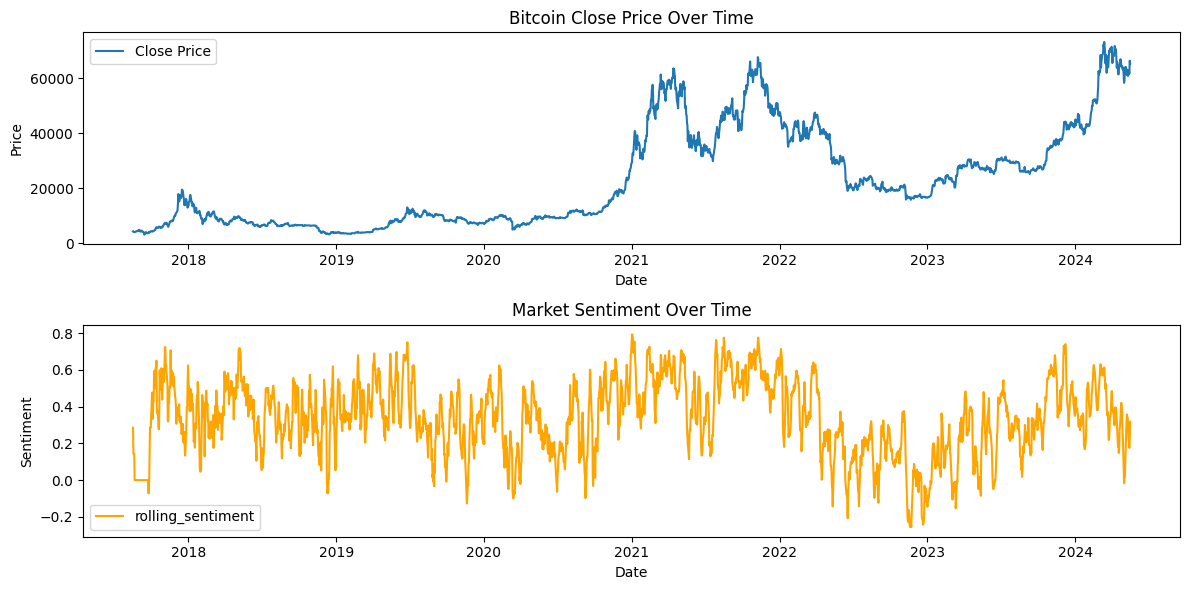

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(merged_df.index, merged_df['Close'], label='Close Price')
plt.title('Bitcoin Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_df.index, merged_df['rolling_sentiment'], label='rolling_sentiment', color='orange')
plt.title('Market Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Sentiment')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = merged_df[['Close', 'rolling_sentiment']].corr()
print(correlation_matrix)

                      Close  rolling_sentiment
Close              1.000000           0.320349
rolling_sentiment  0.320349           1.000000


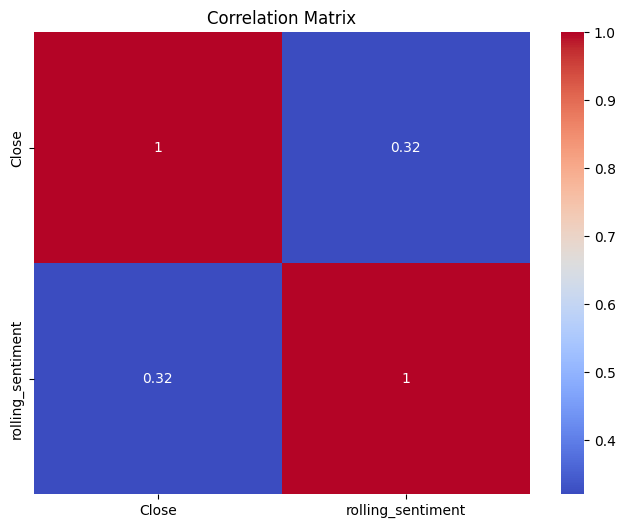

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
merged_df.to_csv('Bitcoin_price_with_sentiments.csv', index_label='date')

Коэффициент корреляции равный 0.32, указывает на умеренную положительную корреляцию между настроением на рынке и ценой биткоина. Это означает, что существует некоторая степень положительной связи между этими двумя переменными, но она не является сильной.